# Ingrid Bakri Kasbah - Mini Project 1 - Dec 21st, 2018



In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [12]:
# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

In [13]:
def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)

In [14]:
def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

In [15]:
def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

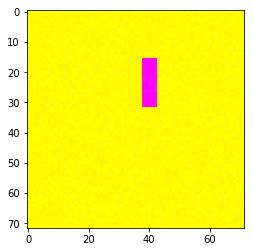

In [16]:
im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='spring')

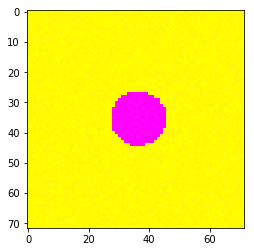

In [17]:
im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='spring')

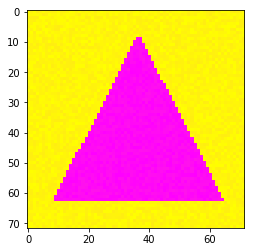

In [21]:
[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='spring')

In [22]:
def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

In [23]:
def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

In [24]:
def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

In [25]:
import matplotlib.patches as patches

In [26]:
def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

In [27]:
def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]

# Part 3: Simple Classification

In [28]:
[X_train, Y_train] = generate_dataset_classification(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [29]:
import keras

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [30]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, adam
from keras.utils import np_utils


In [31]:
#model = Sequential()

In [32]:
model = Sequential([
  Dense(3, input_dim=X_train.shape[1]),
  Activation('softmax')])

In [33]:
from keras.optimizers import SGD
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.005))

In [34]:
model.fit(X_train, np_utils.to_categorical(Y_train), epochs=100, batch_size=32)

Epoch 1/100
300/300 [==============================] - 0s 688us/step - loss: 4.8177
Epoch 2/100
300/300 [==============================] - 0s 67us/step - loss: 3.6092
Epoch 3/100
300/300 [==============================] - 0s 69us/step - loss: 3.1820
Epoch 4/100
300/300 [==============================] - 0s 76us/step - loss: 2.3671
Epoch 5/100
300/300 [==============================] - 0s 99us/step - loss: 2.0265
Epoch 6/100
300/300 [==============================] - 0s 101us/step - loss: 1.5068
Epoch 7/100
300/300 [==============================] - 0s 95us/step - loss: 1.7777
Epoch 8/100
300/300 [==============================] - 0s 106us/step - loss: 1.4641
Epoch 9/100
300/300 [==============================] - 0s 108us/step - loss: 1.7764
Epoch 10/100
300/300 [==============================] - 0s 109us/step - loss: 1.6008
Epoch 11/100
300/300 [==============================] - 0s 106us/step - loss: 0.8683
Epoch 12/100
300/300 [==============================] - 0s 116us/step - loss: 1

300/300 [==============================] - 0s 68us/step - loss: 0.0379
Epoch 99/100
300/300 [==============================] - 0s 93us/step - loss: 0.0412
Epoch 100/100
300/300 [==============================] - 0s 62us/step - loss: 0.0397


In [35]:
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[0., 1., 0.]], dtype=float32)

In [36]:
X_test = generate_a_rectangle()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[1., 0., 0.]], dtype=float32)

In [37]:
X_test, _ = generate_a_triangle()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[0., 0., 1.]], dtype=float32)

# Part 3 with Adam Model

In [38]:
model = Sequential([Dense(3, input_dim=X_train.shape[1]), Activation('softmax')])
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [39]:
model.fit(X_train, np_utils.to_categorical(Y_train), epochs=100, batch_size=32)

Epoch 1/100
300/300 [==============================] - 0s 548us/step - loss: 1.3300
Epoch 2/100
300/300 [==============================] - 0s 76us/step - loss: 0.8960
Epoch 3/100
300/300 [==============================] - 0s 139us/step - loss: 0.4977
Epoch 4/100
300/300 [==============================] - 0s 130us/step - loss: 0.4011
Epoch 5/100
300/300 [==============================] - 0s 85us/step - loss: 0.3442
Epoch 6/100
300/300 [==============================] - 0s 75us/step - loss: 0.2847
Epoch 7/100
300/300 [==============================] - 0s 105us/step - loss: 0.2672
Epoch 8/100
300/300 [==============================] - 0s 53us/step - loss: 0.2318
Epoch 9/100
300/300 [==============================] - 0s 81us/step - loss: 0.2231
Epoch 10/100
300/300 [==============================] - 0s 79us/step - loss: 0.1978
Epoch 11/100
300/300 [==============================] - 0s 108us/step - loss: 0.1934
Epoch 12/100
300/300 [==============================] - 0s 81us/step - loss: 0.1

300/300 [==============================] - 0s 116us/step - loss: 0.0067
Epoch 99/100
300/300 [==============================] - 0s 52us/step - loss: 0.0068
Epoch 100/100
300/300 [==============================] - 0s 77us/step - loss: 0.0066


In [40]:
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[0., 1., 0.]], dtype=float32)

In [41]:
X_test = generate_a_rectangle()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[1., 0., 0.]], dtype=float32)

In [42]:
X_test, _ = generate_a_triangle()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[0., 0., 1.]], dtype=float32)

Both Adam and SGD resulted in correct predictions. Losses for both algorithms, as seen in the model fitting, were decreasing and correctly converging.

# Part 4: Visualization of the solution

In this part, we would like to visualize the result of the model. As such, we will only care about the first matrix, which represents the classifier. As mentioned in the questions, we would like to plot the first three columns --> w[0][0], w[0][1] and w[0][2]

In [43]:
w=model.get_weights()

In [45]:
w[0]

array([[ 0.0276733 , -0.00522389, -0.03386769],
       [ 0.00761076,  0.00732362, -0.02272525],
       [-0.00337397,  0.01495637,  0.03008551],
       ...,
       [ 0.02585368,  0.00774574,  0.00703614],
       [-0.02928523, -0.03231674,  0.02324041],
       [-0.01728578,  0.02273969, -0.03345051]], dtype=float32)

In [46]:
w1=w[0][:,0]

In [47]:
w2=w[0][:,1]

In [48]:
w3=w[0][:,2]

In [49]:
I1=w1.reshape(72,72)
I2=w2.reshape(72,72)
I3=w3.reshape(72,72)

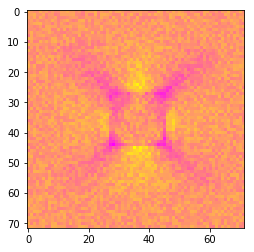

In [55]:
plt.imshow(I1, cmap = 'spring')
plt.show()

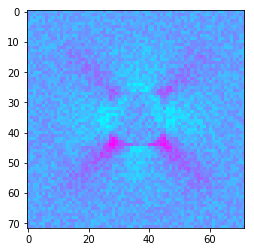

In [56]:
plt.imshow(I2, cmap = 'cool')
plt.show()

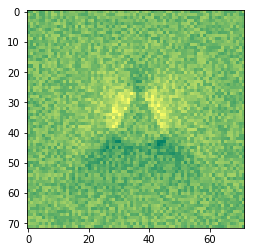

In [59]:
plt.imshow(I3, cmap = 'summer')
plt.show()

# Part 5: A more difficult classification problem

In the following part, we would like to predict the images with convolution models. As seen in class, the function to be used from keras is conv2d. As a first step we will import it and then layers will be added to get the best accuracy possible

In [60]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [61]:
[X_train, Y_train] = generate_dataset_classification(300, 20, True)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


As requested in the questions sheet, we are retaining the model from the previous question:

In [62]:
model = Sequential([Dense(3, input_dim=X_train.shape[1]), Activation('softmax')])
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(X_train, np_utils.to_categorical(Y_train), epochs=50, batch_size = 32)

Epoch 1/50
300/300 [==============================] - 0s 653us/step - loss: 2.0923
Epoch 2/50
300/300 [==============================] - 0s 100us/step - loss: 1.2598
Epoch 3/50
300/300 [==============================] - 0s 107us/step - loss: 1.0482
Epoch 4/50
300/300 [==============================] - 0s 128us/step - loss: 0.9848
Epoch 5/50
300/300 [==============================] - 0s 57us/step - loss: 0.8662
Epoch 6/50
300/300 [==============================] - 0s 81us/step - loss: 1.0334
Epoch 7/50
300/300 [==============================] - 0s 76us/step - loss: 1.2733
Epoch 8/50
300/300 [==============================] - 0s 116us/step - loss: 1.0506
Epoch 9/50
300/300 [==============================] - 0s 114us/step - loss: 1.1096
Epoch 10/50
300/300 [==============================] - 0s 103us/step - loss: 0.9885
Epoch 11/50
300/300 [==============================] - 0s 99us/step - loss: 0.8692
Epoch 12/50
300/300 [==============================] - 0s 123us/step - loss: 0.8197
Epoch

In [63]:
[X_test, Y_test] = generate_test_set_classification()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [64]:
model.evaluate(X_test,Y_test)

300/300 [==============================] - 0s 186us/step


0.8302053324381511

In order for the convolution to be applicable, reshaping the data is necessary, as seen below:

In [65]:

X_train = X_train.reshape(X_train.shape[0], 72, 72, 1)
X_test = X_test.reshape(X_test.shape[0], 72, 72, 1)

In [66]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(72,72,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(3,activation='softmax'))
model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy']) #Adding the accuracy to check the performance
model.fit(X_train, np_utils.to_categorical(Y_train), epochs=10, batch_size=32)

Epoch 1/10
300/300 [==============================] - 1s 4ms/step - loss: 1.8126 - acc: 0.3433
Epoch 2/10
300/300 [==============================] - 1s 3ms/step - loss: 1.0070 - acc: 0.6233
Epoch 3/10
300/300 [==============================] - 1s 3ms/step - loss: 0.8309 - acc: 0.7433
Epoch 4/10
300/300 [==============================] - 1s 3ms/step - loss: 0.7119 - acc: 0.8167
Epoch 5/10
300/300 [==============================] - 1s 3ms/step - loss: 0.6116 - acc: 0.8167
Epoch 6/10
300/300 [==============================] - 1s 3ms/step - loss: 0.5521 - acc: 0.8100
Epoch 7/10
300/300 [==============================] - 1s 3ms/step - loss: 0.5070 - acc: 0.8633
Epoch 8/10
300/300 [==============================] - 1s 3ms/step - loss: 0.4618 - acc: 0.8600
Epoch 9/10
300/300 [==============================] - 1s 3ms/step - loss: 0.4540 - acc: 0.8433
Epoch 10/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3816 - acc: 0.9100


In [67]:
model.evaluate(X_test, Y_test)

300/300 [==============================] - 0s 1ms/step


[0.7205807717641195, 0.686666665871938]

The above model has shown an accuracy of 68% which is not ideal but considered good enough

# Part 6: A Regression Model

Below, we kept on increasing the train size until we got satisfactory accuracies in the tests that follow

In [68]:
[X_train, Y_train] = generate_dataset_regression(3000, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2

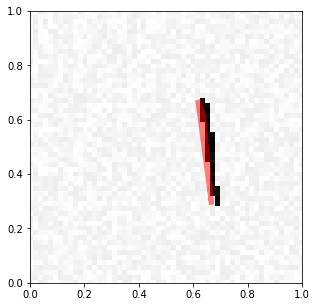

In [69]:
 visualize_prediction(X_train[0], Y_train[0])

In [70]:
[X_test, Y_test] = generate_test_set_regression()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


Y_train is composed of arrays, and each array has 6 entries (corresponding to X and Y coordinates of the 3 edges), to each X coordinate there will be a corresponding Y coordinate. Below, we will perform normalization by sorting the vertices in descending order based on their X-coordinate to which Y will be associated.

In [71]:
def normalize (y_train):
    list1=[]
    import numpy as np
    x=[y_train[0],y_train[2],y_train[4]]
    y=[y_train[1],y_train[3],y_train[5]]
    index_min=np.argmin(y)
    list1.append(x[index_min])
    list1.append(y[index_min])
    del x[index_min]
    del y[index_min]
    index_min=np.argmin(y)
    list1.append(x[index_min])
    list1.append(y[index_min])
    del y[index_min]
    del x[index_min]
    index_min=np.argmin(y)
    list1.append(x[index_min])
    list1.append(y[index_min])
    del y[index_min]
    del x[index_min]
    return list1
        
            

Below is a loop to apply the normalize function (meaning to sort) each "row" of the array

In [72]:
for i in range(Y_train.shape[0]):
    Y_train[i] = normalize(Y_train[i])
for i in range(Y_test.shape[0]):
    Y_test[i] = normalize(Y_test[i])

In [73]:
X_train = X_train.reshape(X_train.shape[0], 72, 72, 1)
X_test = X_test.reshape(X_test.shape[0], 72, 72, 1)

# In the following: Note that below the fitting time is taking too long. In the case where it needs to be run for evaluation purposes, reduce the number of epcohs. It was increased to 50 in order to get higher accuracies

In [74]:
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization


model = Sequential()
model.add(Conv2D(16, kernel_size=(7, 7), activation='relu', padding='same', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(7, 7), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(7, 7), activation='relu', padding='same'))

model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(6))

model.compile(optimizer="adam", loss='mse')
model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split = 0.05, shuffle = True)




Train on 2850 samples, validate on 150 samples
Epoch 1/50
2850/2850 [==============================] - 37s 13ms/step - loss: 0.0714 - val_loss: 0.0512
Epoch 2/50
2850/2850 [==============================] - 42s 15ms/step - loss: 0.0288 - val_loss: 0.0210
Epoch 3/50
2850/2850 [==============================] - 35s 12ms/step - loss: 0.0192 - val_loss: 0.0143
Epoch 4/50
2850/2850 [==============================] - 32s 11ms/step - loss: 0.0137 - val_loss: 0.0102
Epoch 5/50
2850/2850 [==============================] - 33s 12ms/step - loss: 0.0110 - val_loss: 0.0079
Epoch 6/50
2850/2850 [==============================] - 33s 11ms/step - loss: 0.0089 - val_loss: 0.0088
Epoch 7/50
2850/2850 [==============================] - 33s 12ms/step - loss: 0.0082 - val_loss: 0.0055
Epoch 8/50
2850/2850 [==============================] - 33s 12ms/step - loss: 0.0070 - val_loss: 0.0061
Epoch 9/50
2850/2850 [==============================] - 33s 11ms/step - loss: 0.0067 - val_loss: 0.0062
Epoch 10/50
2850/

Although the convergence seems satisfactory, the model fitting has been very slow

In [75]:
model.evaluate(X_test,Y_test)

300/300 [==============================] - 1s 4ms/step


0.003086857032030821

as it is shown, we got very low loss in the previous model. That is mainly due to 1) the sorting we used as a normalization technique and also due to the increased number of training sets, to get higher accuracies and lower losses. 

In [76]:
Y_predict = model.predict(X_test)

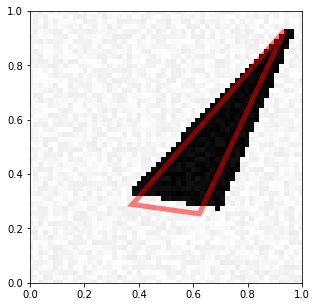

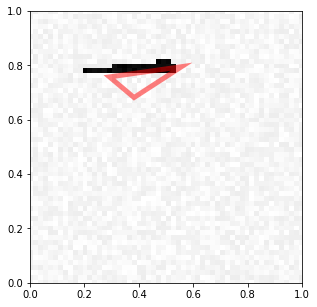

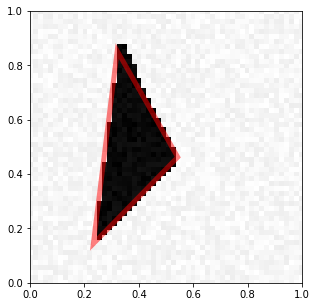

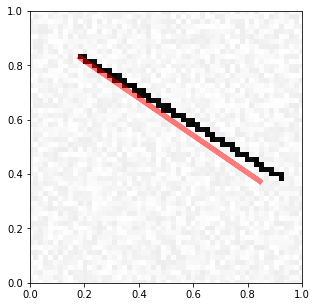

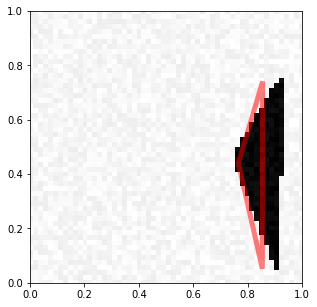

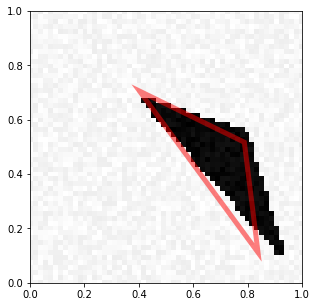

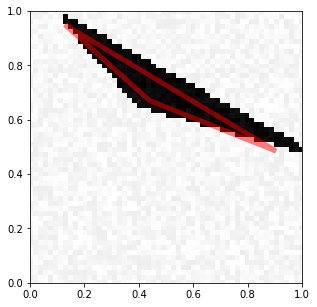

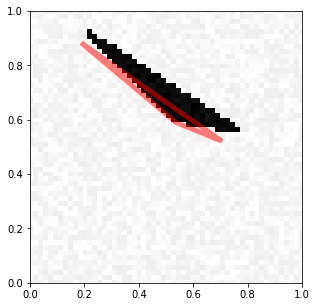

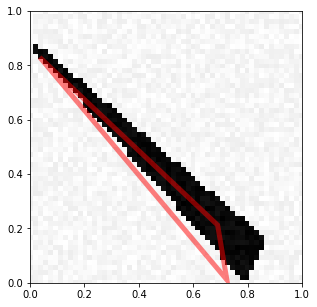

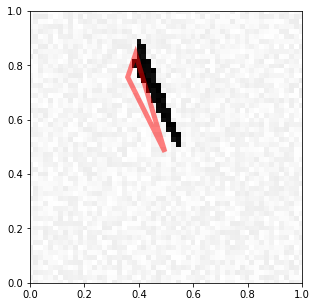

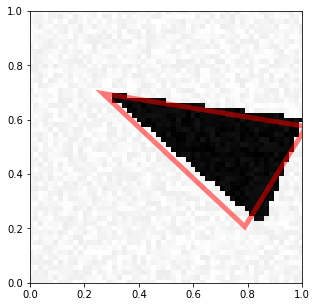

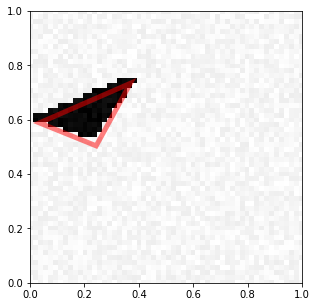

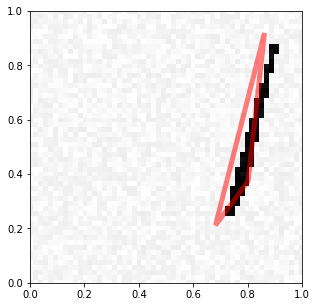

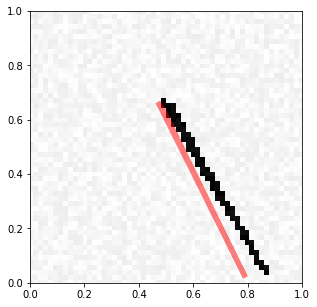

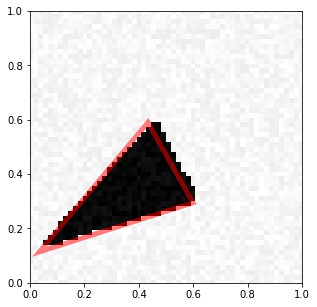

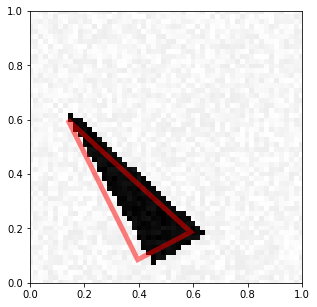

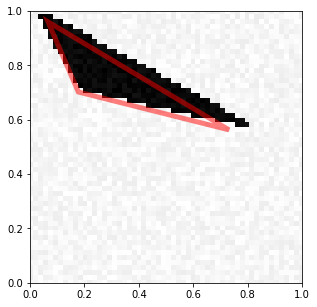

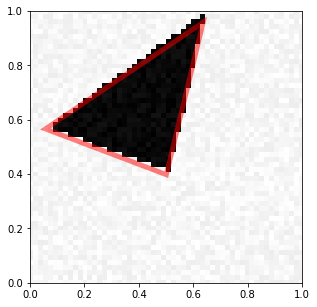

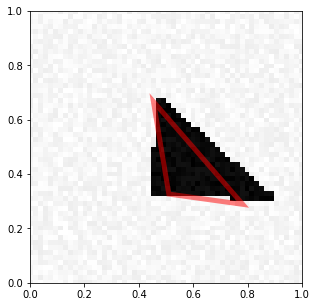

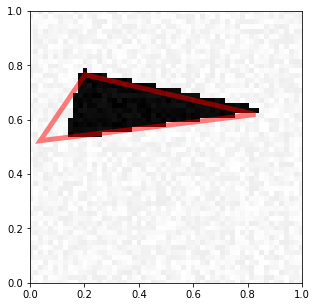

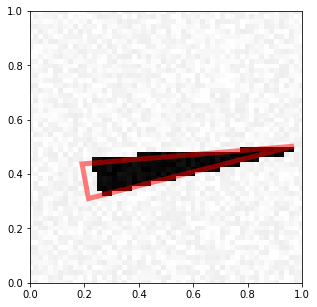

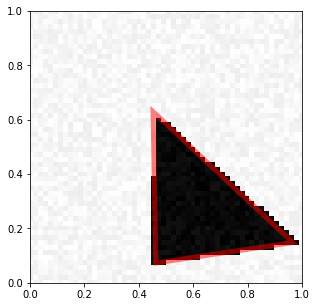

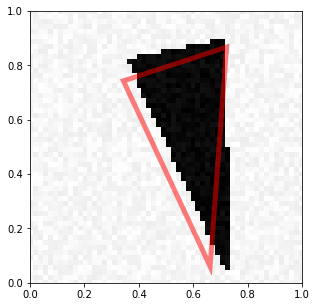

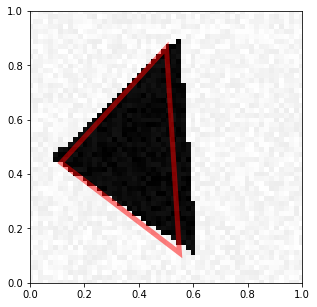

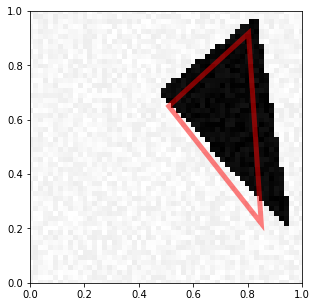

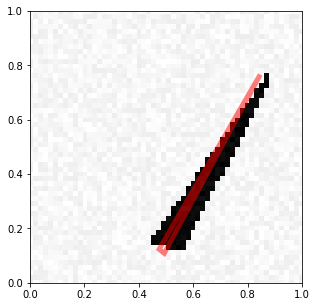

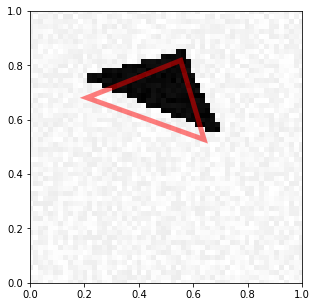

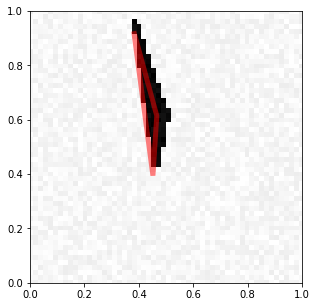

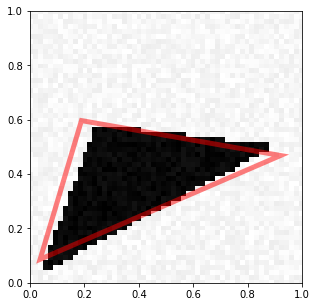

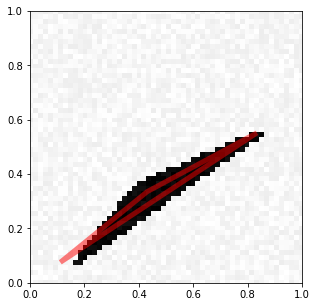

In [77]:
for i in range(30):
    visualize_prediction(X_test[i], Y_predict[i])
    plt.show()

The above figures have shown good overall results. In red are the predicted shapes, in black are the actual ones. After several trials, the final results, as above, have shown that our model was able to predict the eddges and vertices correctly; as a matter of fact, some of the shapes were perfectly predicted. However, it is noticeable that not all the triangular shapes are predicted correclty and there are some disrepancies, however they are very minimal. The majority has been predicted with good accuracy.

# Part 7: Image Denoising

In order to get both original and noisy figures, we have added in the dataset classification generator another output (X2) which is noise free. On the other hand, X1 includes noise which we will determine manually when calling the function

In [78]:
def generate_dataset_classification_noise(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X1 = np.zeros([nb_samples,im_size])
    X2 = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X1[i] = generate_a_rectangle(noise, free_location)
            X2[i] = generate_a_rectangle(0, free_location) 
        elif category == 1: 
            X1[i] = generate_a_disk(noise, free_location)
            X2[i] = generate_a_disk(0, free_location)
        else:
            [X1[i], V] = generate_a_triangle(noise, free_location)
            [X2[i], V] = generate_a_triangle(0, free_location)
        Y[i] = category
    return [X2, X1]

def generate_test_set_classification_noise():
    np.random.seed(52)
    [X_test, X_D_test] = generate_dataset_classification_noise(300, 500, True)
    return [X_test, X_D_test]

In [79]:
im_orig,im_noise = generate_dataset_classification_noise(nb_samples=300,noise=500)
X_test,Y_test = generate_dataset_classification_noise(nb_samples=300,noise=500)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


Below, we are standardizing our training and testing data

In [80]:
X_test /= 250
Y_test /=250
im_orig /= 250
im_noise /=250

Below we are testing the corresponding shapes of our data

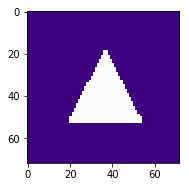

In [82]:
plt.subplot(1,2,2)
plt.imshow(X_test[10].reshape(72,72), cmap='Purples')
#plt.imshow(im_noise[0].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

In [83]:
im_orig.shape[1]

5184

In [84]:
im_noise =im_noise.reshape(im_noise.shape[0], 72, 72, 1)
X_test = X_test.reshape(X_test.shape[0], 72, 72, 1)

im_orig = im_orig.reshape(im_noise.shape[0], 72, 72, 1)
Y_test = Y_test.reshape(Y_test.shape[0], 72, 72, 1)

In [85]:
from keras.layers import Conv2DTranspose
from keras.layers import UpSampling2D
from keras.layers import Reshape

model = Sequential()
model.add(Conv2D(32, (4, 4), activation='relu', padding = 'same', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (4, 4), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2DTranspose(16, (5, 5), activation = "relu", padding = 'same'))
model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2DTranspose(16, (5, 5), activation = "relu", padding = 'same'))
model.add(Dense(1))
model.compile(optimizer="adam",
              loss='mse')

model.fit(im_noise, im_orig, epochs=100, batch_size=32, validation_split = 0.1)

Train on 270 samples, validate on 30 samples
Epoch 1/100
270/270 [==============================] - 6s 21ms/step - loss: 0.4364 - val_loss: 0.2619
Epoch 2/100
270/270 [==============================] - 6s 23ms/step - loss: 0.2023 - val_loss: 0.1898
Epoch 3/100
270/270 [==============================] - 5s 18ms/step - loss: 0.1610 - val_loss: 0.1535
Epoch 4/100
270/270 [==============================] - 5s 18ms/step - loss: 0.1376 - val_loss: 0.1316
Epoch 5/100
270/270 [==============================] - 5s 19ms/step - loss: 0.1245 - val_loss: 0.1279
Epoch 6/100
270/270 [==============================] - 5s 18ms/step - loss: 0.1135 - val_loss: 0.1196
Epoch 7/100
270/270 [==============================] - 5s 19ms/step - loss: 0.1098 - val_loss: 0.1190
Epoch 8/100
270/270 [==============================] - 5s 20ms/step - loss: 0.1100 - val_loss: 0.1188
Epoch 9/100
270/270 [==============================] - 5s 19ms/step - loss: 0.1099 - val_loss: 0.1158
Epoch 10/100
270/270 [===============

270/270 [==============================] - 5s 17ms/step - loss: 0.1017 - val_loss: 0.1118
Epoch 81/100
270/270 [==============================] - 5s 18ms/step - loss: 0.0977 - val_loss: 0.1050
Epoch 82/100
270/270 [==============================] - 5s 17ms/step - loss: 0.0968 - val_loss: 0.1032
Epoch 83/100
270/270 [==============================] - 5s 17ms/step - loss: 0.0967 - val_loss: 0.1028
Epoch 84/100
270/270 [==============================] - 5s 17ms/step - loss: 0.0973 - val_loss: 0.1106
Epoch 85/100
270/270 [==============================] - 5s 17ms/step - loss: 0.1026 - val_loss: 0.1194
Epoch 86/100
270/270 [==============================] - 5s 17ms/step - loss: 0.0992 - val_loss: 0.1051
Epoch 87/100
270/270 [==============================] - 5s 17ms/step - loss: 0.0975 - val_loss: 0.1037
Epoch 88/100
270/270 [==============================] - 5s 17ms/step - loss: 0.0962 - val_loss: 0.1105
Epoch 89/100
270/270 [==============================] - 5s 17ms/step - loss: 0.0958 - 

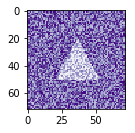

In [86]:
plt.subplot(1, 3, 1)
plt.imshow(Y_test[0,:,:,0],cmap="Purples")

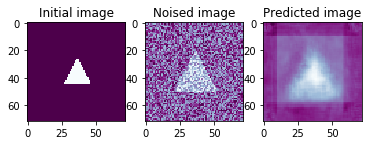

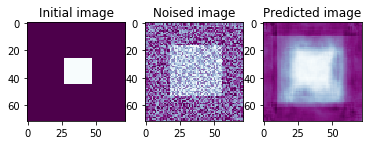

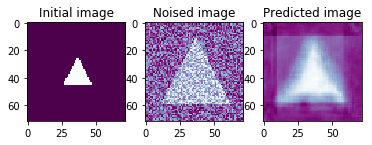

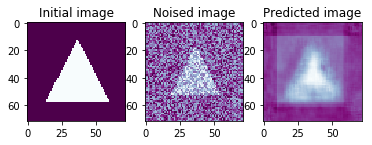

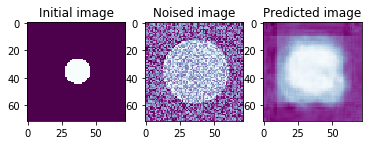

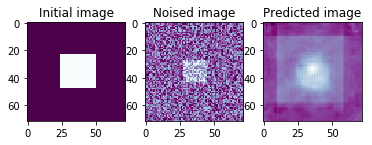

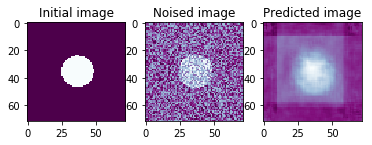

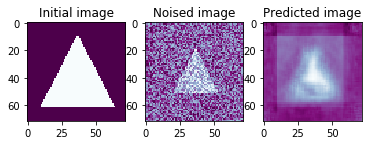

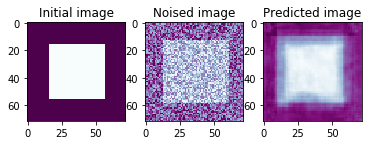

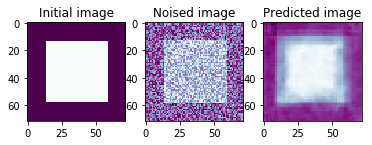

In [87]:
for i in range(10):
    plt.subplot(1, 3, 1)
    plt.imshow(X_test[i,:,:,0], cmap='BuPu')
    plt.title("Initial image")
    plt.subplot(1, 3, 2)
    plt.imshow(Y_test[i,:,:,0], cmap='BuPu')
    plt.title('Noised image')
    plt.subplot(1, 3, 3)
    plt.imshow(model.predict(Y_test)[i,:,:,0], cmap='BuPu', label = "predicted")
    plt.title('Predicted image')
    plt.show()

looking at the previous predictions, we note that the model is obviously not perfect, however we can see that it is predicting the correct shapes. This can be fixed by adding layers and/or changing densities.